### Problem statement : 
We have given a Bike share data related to bike share counts with respect to different attributes. We have to train a model in such a way that, when we enter the attributes, it should predict the bike share count.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error, max_error, r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [92]:
bikeshare_df = pd.read_csv("/DataWorld/Data_Science/datasets/bike_share.csv")

In [93]:
bikeshare_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [94]:
bikeshare_df.shape

(10886, 11)

In [95]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [96]:
bikeshare_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [97]:
bikeshare_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [98]:
bikeshare_df[bikeshare_df.isna()].sum()

season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

## Data observations and actions 

#### Common observations : 
* All features are numerical or already encoded data. hence no explicit encoding reqiured.
* There is no null values, hence no need to find and fill the missing values.
* No outliers in converted categorical featues like season, holiday, workingday, weather.
* data in Numerical continuous featues like temp, atemp, himidity, windspeed is normally distributed. As median and mean are almost same.

#### Column specific observations : 

1. Season, weather : It is categorical and already done with label encoding. 
     * No Action required.
2. holiday and workingday : THese are of Binary type 
     * No Action required.
3. atemp, casual and registered :
     * Can be dropped
4. temp, humidity, windspeed : 
     * no action required.

<AxesSubplot:ylabel='season'>

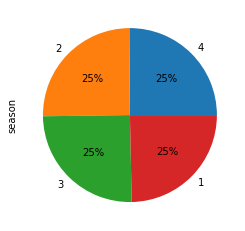

In [99]:
bikeshare_df.season.value_counts().plot(kind='pie', autopct='%1.0f%%' )

<AxesSubplot:ylabel='holiday'>

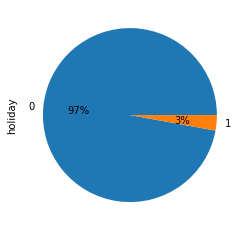

In [100]:
bikeshare_df.holiday.value_counts().plot(kind='pie', autopct='%1.0f%%' )

<AxesSubplot:ylabel='workingday'>

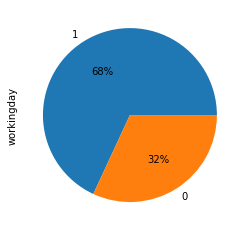

In [101]:
bikeshare_df.workingday.value_counts().plot(kind='pie', autopct='%1.0f%%' )

<AxesSubplot:ylabel='weather'>

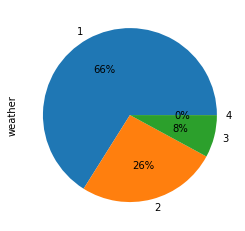

In [102]:
bikeshare_df.weather.value_counts().plot(kind='pie', autopct='%1.0f%%' )

In [103]:
bikeshare_df.drop(columns=['atemp', 'casual', 'registered'],inplace=True)

In [104]:
bikeshare_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count'],
      dtype='object')

<AxesSubplot:>

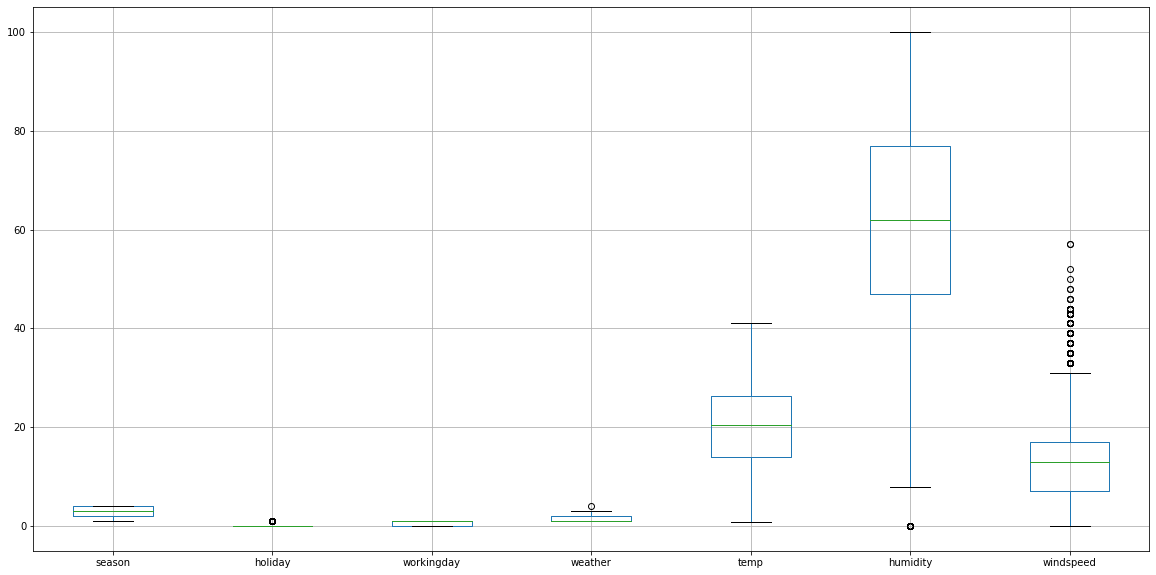

In [105]:
plt.figure(figsize=(20,10))
bikeshare_df.drop(columns=['count']).boxplot()

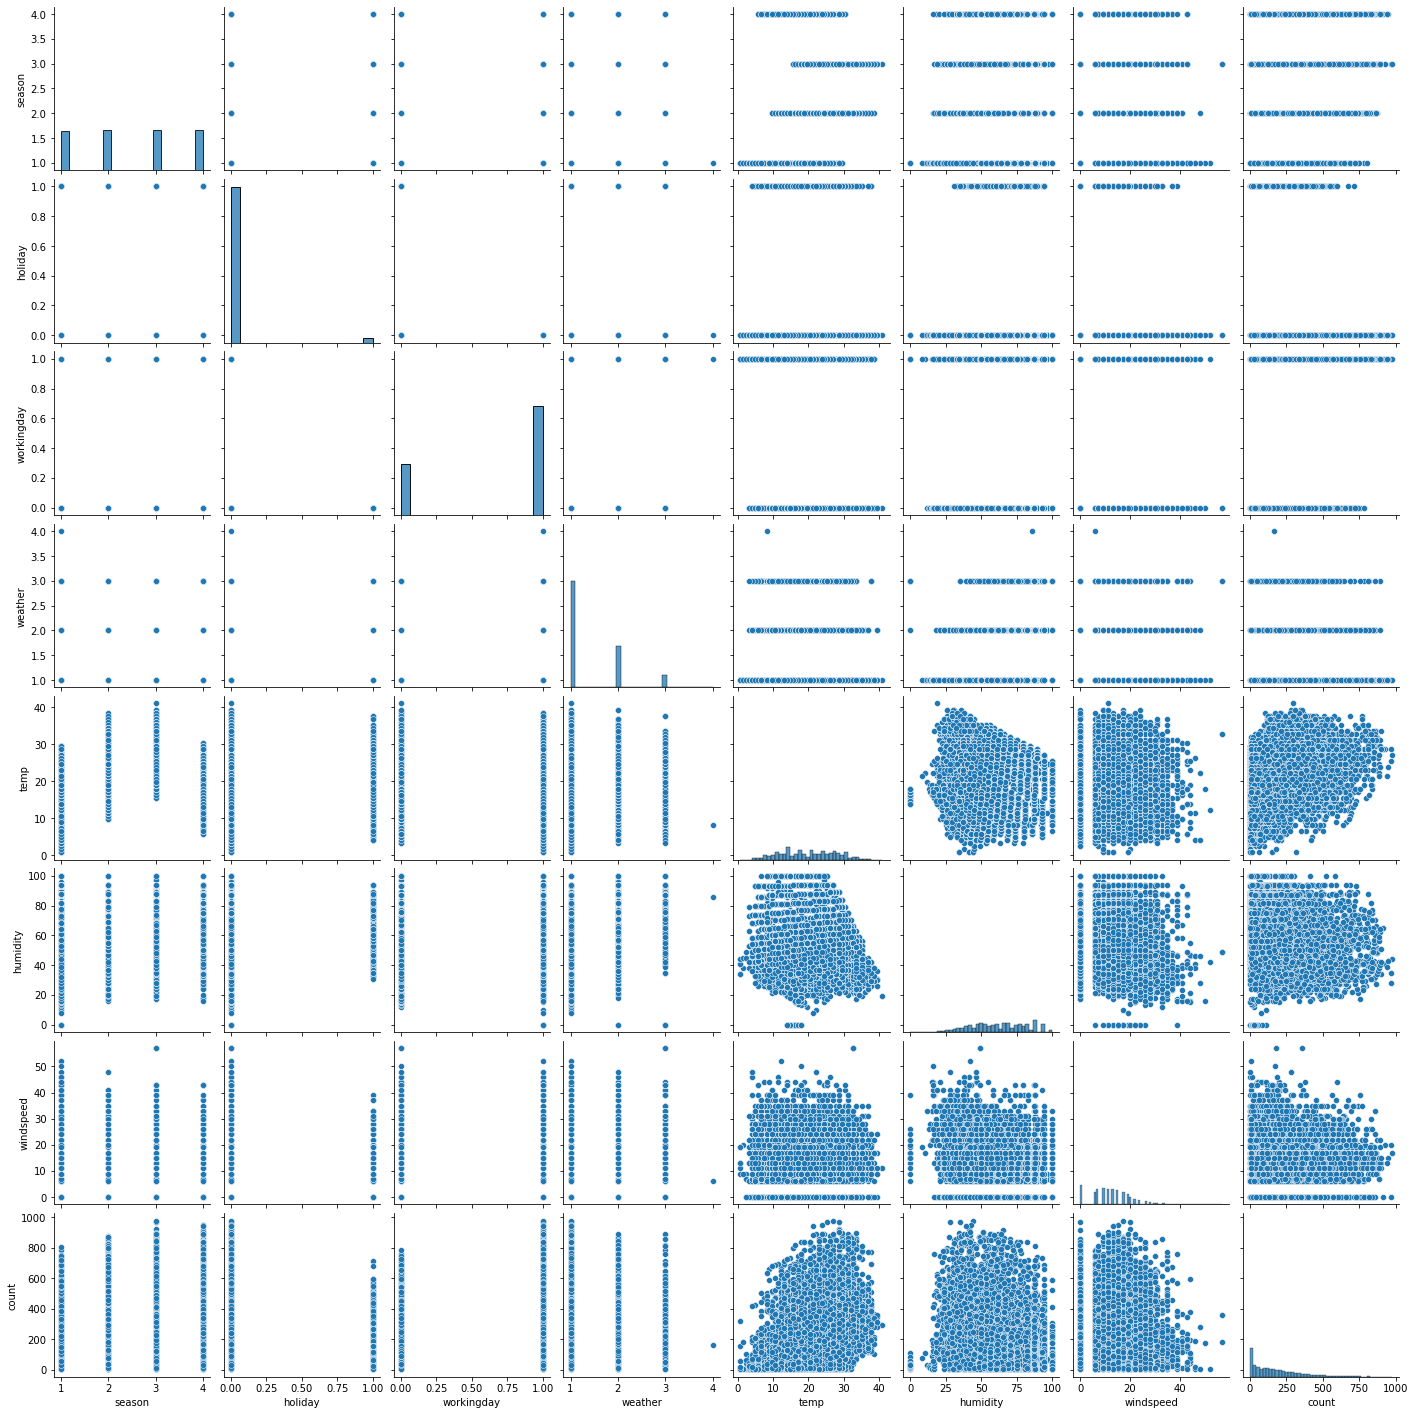

In [106]:
sns.pairplot(bikeshare_df)

In [107]:
cr = bikeshare_df.corr()
cr

,season,holiday,workingday,weather,temp,humidity,windspeed,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.190610,-0.147121,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,0.001929,0.008409,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,-0.010880,0.013373,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,0.406244,0.007261,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,-0.064949,-0.017852,0.394454
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,1.000000,-0.318607,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.318607,1.000000,0.101369
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,-0.317371,0.101369,1.000000


## Multicolinearity : Variance inflation factor ( VIF)


In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

X = bikeshare_df.drop(columns=['count'])
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

      feature        VIF
0      season   6.549979
1     holiday   1.091975
2  workingday   3.131174
3     weather   7.311974
4        temp   6.815421
5    humidity  10.916335
6   windspeed   2.994873


In [109]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [110]:

X = bikeshare_df.drop(columns=['count'])
y = bikeshare_df['count']
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3)

In [111]:
y_train.head()

8963    427
6442    210
5         1
6080    144
7478    135
Name: count, dtype: int64

In [112]:
lr = LinearRegression()

In [113]:
lr.fit(X_train,y_train)

LinearRegression()

In [114]:
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [115]:
lr.intercept_

191.09158066781703

In [116]:
lr.coef_

array([ 24.723476  ,  -1.24264126,   0.46812607,   3.39346496,
        63.09638857, -56.6637754 ,   5.41981396])

In [169]:
def error_metrics(y, y_pred, case_type):
    mse = mean_squared_error(y,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y,y_pred)
    me = max_error(y,y_pred)
    r2score = r2_score(y,y_pred)
    print("MSE "+ case_type + ":", mse)
    print("RMSE "+ case_type + ":", rmse)
    print("MAE "+ case_type + ":", mae)
    print("MAPE "+ case_type + ":", mape)
    print("Max Error "+ case_type + ":", me)
    print("R2 Score "+ case_type + ":", r2score)
    

In [170]:
error_metrics(y_train,y_train_pred, "train")

MSE train: 24353.735471082557
RMSE train: 156.05683410566343
MAE train: 117.00214935180618
MAPE train: 4.842679075247765
Max Error train: 679.073039967834
R2 Score train: 0.26087597479573654


In [171]:
error_metrics(y_test,y_test_pred, "test")

MSE test: 24242.425675183917
RMSE test: 155.69979343333733
MAE test: 116.45192414841739
MAPE test: 4.780502205880651
Max Error test: 660.0501539140591
R2 Score test: 0.2537435580037847


## Thank you for reviewing